## NLP on LinkedIn Scraped Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading file
df= pd.read_csv('linkedin_data 2023-03-31_final.csv')

In [3]:
df.head()

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,3/31/2023,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,3/31/2023,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,3/31/2023,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,3/31/2023,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,3/31/2023,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time


In [4]:
df.tail()

,Date,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
1122,3/31/2023,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,3/31/2023,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,3/31/2023,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate
1125,3/31/2023,Software Performance Analyst (Cyber Security),BlackBerry,"Uttar Pradesh, India",On-site,"5,001-10,000 employees","306,410 followers",65 applicants,Computer Software,Full-time
1126,3/31/2023,Team Lead-Big Data,Infogain,"Gurugram, Haryana, India",On-site,"5,001-10,000 employees","209,419 followers",40 applicants,Information Technology & Services,Full-time


In [5]:
df.dtypes

Date           object
Job_Name       object
Company        object
Loaction       object
Job_type       object
Employees      object
Followers      object
Applicant      object
Industry       object
Invovlement    object
dtype: object

In [6]:
df.shape

(1127, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1127 non-null   object
 1   Job_Name     1127 non-null   object
 2   Company      1127 non-null   object
 3   Loaction     1127 non-null   object
 4   Job_type     1127 non-null   object
 5   Employees    1127 non-null   object
 6   Followers    1127 non-null   object
 7   Applicant    1126 non-null   object
 8   Industry     1126 non-null   object
 9   Invovlement  1127 non-null   object
dtypes: object(10)
memory usage: 88.2+ KB


In [8]:
df.nunique()

Date             1
Job_Name       696
Company        520
Loaction        95
Job_type         3
Employees        9
Followers      932
Applicant      206
Industry        66
Invovlement     20
dtype: int64

In [9]:
# Checking null values
df.isna().sum()

Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      1
Industry       1
Invovlement    0
dtype: int64

In [10]:
# Dropping null values
df.dropna(subset=['Applicant','Industry'],inplace= True)

In [11]:
df.isna().sum()

Date           0
Job_Name       0
Company        0
Loaction       0
Job_type       0
Employees      0
Followers      0
Applicant      0
Industry       0
Invovlement    0
dtype: int64

In [12]:
# Dropping Date column
df1=df.drop('Date', axis=1)
df1

,Job_Name,Company,Loaction,Job_type,Employees,Followers,Applicant,Industry,Invovlement
0,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time
...,...,...,...,...,...,...,...,...,...
1122,AM- Analytics-ANA007048,Genpact,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","2,639,117 followers",58 applicants,Information Technology & Services,Full-time · Associate
1123,Senior Data & API Consultant,Pluralsight,"Bengaluru, Karnataka, India",Hybrid,"1,001-5,000 employees","175,876 followers",3 applicants,Computer Software,Full-time · Mid-Senior level
1124,Staff,Bunge,"Andhra Pradesh, India",On-site,"10,001+ employees","1,213,984 followers",66 applicants,Food Production,Full-time · Associate
1125,Software Performance Analyst (Cyber Security),BlackBerry,"Uttar Pradesh, India",On-site,"5,001-10,000 employees","306,410 followers",65 applicants,Computer Software,Full-time


In [13]:
# Renaming some columns
df1.rename(columns={'Loaction': 'Location', 'Invovlement': 'Involvement'},inplace= True)
df1.head()

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement
0,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time


In [14]:
df1.describe()

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement
count,1125,1125,1125,1125,1125,1125,1125,1125,1125
unique,695,519,95,3,8,930,206,66,20
top,Data Analyst,Accenture in India,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","8,734 followers",1 month ago O...,Information Technology & Services,Full-time · Mid-Senior level
freq,69,52,285,724,547,10,31,418,517


In [15]:
# Checking duplicates
df1.duplicated().sum()

79

In [16]:
# Droping duplicates
df2=df1.drop_duplicates()

In [17]:
df2.head()

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement
0,"Client Technology: Platform Engineering, Senio...",EY,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level
1,Associate - Global Intelligence (Open Source C...,JPMorgan Chase & Co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time
2,MTS Software Development Eng.,AMD,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level
3,Tech Lead - Wifi Development,VVDN Technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level
4,Senior Application Specialist,Leica Biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time


In [18]:
df2.shape

(1046, 9)

##### Value Counts

In [19]:
df2['Job_Name'].value_counts()

Job_Name
Data Analyst                                       62
Senior Data Analyst                                12
Senior Analytics Consultant                        11
Lead Data Analyst                                   7
EA_P&U_Data Analyst (P&U OT)_Staff                  7
                                                   ..
Jr. Power BI                                        1
Lead Data Analyst - Transactions                    1
Data Analyst - Training Program  Only for Women     1
Data Analyst & Campaign Operations                  1
Team Lead-Big Data                                  1
Name: count, Length: 695, dtype: int64

In [20]:
df2['Company'].value_counts()

Company
Accenture in India    50
Wells Fargo           31
EY                    22
Citi                  20
BNY Mellon            20
                      ..
WhiteCrow Research     1
Mantys (YC W23)        1
Parexel                1
Emmes                  1
Pluralsight            1
Name: count, Length: 519, dtype: int64

In [21]:
df2['Location'].value_counts()

Location
Bengaluru, Karnataka, India       271
Mumbai, Maharashtra, India        116
Hyderabad, Telangana, India        93
Pune, Maharashtra, India           78
Chennai, Tamil Nadu, India         61
                                 ... 
Mysore, Karnataka, India            1
Salem, Tamil Nadu, India            1
Kulgam, Jammu & Kashmir, India      1
Puducherry, Puducherry, India       1
Telangana, India                    1
Name: count, Length: 95, dtype: int64

In [22]:
df2['Job_type'].value_counts()

Job_type
On-site    675
Hybrid     318
Remote      53
Name: count, dtype: int64

In [23]:
df2['Employees'].value_counts()

Employees
10,001+ employees         538
1,001-5,000 employees     157
51-200 employees           73
501-1,000 employees        72
201-500 employees          67
11-50 employees            66
5,001-10,000 employees     59
2-10 employees             14
Name: count, dtype: int64

In [24]:
df2['Followers'].value_counts()

Followers
8,734 followers        9
84,683 followers       6
497,744 followers      5
1,628,890 followers    5
497,747 followers      5
                      ..
7,175,348 followers    1
42,974 followers       1
55,072 followers       1
42,055 followers       1
209,419 followers      1
Name: count, Length: 930, dtype: int64

In [25]:
df2['Applicant'].value_counts()

Applicant
1 month ago                                  Over 200 applicants    30
2 weeks ago                                  Over 200 applicants    27
1 week ago                                  Over 200 applicants     22
3 weeks ago                                  Over 200 applicants    21
1 applicant                                                         20
                                                                    ..
2 hours ago                                                          1
195 applicants                                                       1
139 applicants                                                       1
73 applicants                                                        1
9 hours ago                                                          1
Name: count, Length: 206, dtype: int64

In [26]:
df2['Industry'].value_counts()

Industry
Information Technology & Services    395
Financial Services                   159
Computer Software                     95
Staffing & Recruiting                 29
Human Resources                       26
                                    ... 
Aviation & Aerospace                   1
Mining & Metals                        1
Farming                                1
Newspapers                             1
Mental Health Care                     1
Name: count, Length: 66, dtype: int64

In [27]:
df2['Involvement'].value_counts()

Involvement
Full-time · Mid-Senior level                        488
Full-time                                           234
Full-time · Entry level                             183
Full-time · Associate                                78
Part-time                                             9
Contract · Entry level                                8
Full-time · Internship                                8
Full-time · Executive                                 7
Temporary                                             5
Contract · Mid-Senior level                           5
Part-time · Internship                                4
Full-time · Director                                  4
Contract                                              3
Contract · Associate                                  2
Part-time · Entry level                               2
Internship · Internship                               2
Internship · Mid-Senior level                         1
₹110,000/hr - ₹125,000/hr · Contract

### Data Preprocessing

In [28]:
# Preprocess the data
df2['Job_Name'] = df1['Job_Name'].str.lower()
df2['Company'] = df1['Company'].str.lower()
df2['job_company'] = df1['Job_Name'] + ' ' + df1['Company']

In [29]:
# extraction region and states from location column
def extract_location(lo):
    l = lo.split(',')
    if len(l) == 3:
        region = l[0]
        state = l[1]
    elif len(l) == 2:
        region = l[0]
        state = l[0]
    else:
        region = " Not Mention (remote)"
        state = " Not mention (Remote)"
    return pd.Series([region, state], index=['Region', 'State'])


In [30]:
df2.head(2)

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement,job_company
0,"client technology: platform engineering, senio...",ey,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level,"Client Technology: Platform Engineering, Senio..."
1,associate - global intelligence (open source c...,jpmorgan chase & co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time,Associate - Global Intelligence (Open Source C...


In [31]:
df2[['Region', 'State']] = df2["Location"].apply(extract_location)

In [32]:
df2.head()

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement,job_company,Region,State
0,"client technology: platform engineering, senio...",ey,"Trivandrum, Kerala, India",On-site,"10,001+ employees","7,366,377 followers",9 applicants,Information Technology & Services,Full-time · Mid-Senior level,"Client Technology: Platform Engineering, Senio...",Trivandrum,Kerala
1,associate - global intelligence (open source c...,jpmorgan chase & co.,"Mumbai, Maharashtra, India",On-site,"10,001+ employees","3,791,093 followers",10 applicants,Financial Services,Full-time,Associate - Global Intelligence (Open Source C...,Mumbai,Maharashtra
2,mts software development eng.,amd,"Bengaluru, Karnataka, India",On-site,"10,001+ employees","1,068,681 followers",41 applicants,Semiconductors,Full-time · Mid-Senior level,MTS Software Development Eng. AMD,Bengaluru,Karnataka
3,tech lead - wifi development,vvdn technologies,"Chennai, Tamil Nadu, India",On-site,"10,001+ employees","62,010 followers",13 applicants,Information Technology & Services,Full-time · Mid-Senior level,Tech Lead - Wifi Development VVDN Technologies,Chennai,Tamil Nadu
4,senior application specialist,leica biosystems,"Mumbai, Maharashtra, India",On-site,"1,001-5,000 employees","86,924 followers",78 applicants,Medical Device,Full-time,Senior Application Specialist Leica Biosystems,Mumbai,Maharashtra


In [33]:
df2.columns

Index(['Job_Name', 'Company', 'Location', 'Job_type', 'Employees', 'Followers',
       'Applicant', 'Industry', 'Involvement', 'job_company', 'Region',
       'State'],
      dtype='object')

In [34]:
# applying one hot encoding(0 and 1 values)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df2[['Job_Name', 'Company', 'Job_type',
                                          'Industry', 'Involvement', 'Region', 'State']])

In [35]:
# Applying cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(encoded_data)

In [36]:
# preprocessing and cleaning column names
df2["Followers"]=df2["Followers"].str.replace('followers','').str.replace(',', '')
df2["Employees"]=df2["Employees"].str.split("+").str[0]
df2["Employees"]=df2["Employees"].str.split("-").str[0].str.replace(',', '')
df2['Applicant']=df2['Applicant'].str.split(" ").str[0]
df2['Involvement'] = df2['Involvement'].str.replace('Full-time', '').str.replace('·', '')

In [37]:
# converted to numeric data
df2[["Followers", "Employees","Applicant"]] = df2[["Followers", "Employees","Applicant"]].apply(pd.to_numeric)

In [38]:
df2.head(2)

,Job_Name,Company,Location,Job_type,Employees,Followers,Applicant,Industry,Involvement,job_company,Region,State
0,"client technology: platform engineering, senio...",ey,"Trivandrum, Kerala, India",On-site,10001,7366377,9,Information Technology & Services,Mid-Senior level,"Client Technology: Platform Engineering, Senio...",Trivandrum,Kerala
1,associate - global intelligence (open source c...,jpmorgan chase & co.,"Mumbai, Maharashtra, India",On-site,10001,3791093,10,Financial Services,,Associate - Global Intelligence (Open Source C...,Mumbai,Maharashtra


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, 0 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job_Name     1046 non-null   object
 1   Company      1046 non-null   object
 2   Location     1046 non-null   object
 3   Job_type     1046 non-null   object
 4   Employees    1046 non-null   int64 
 5   Followers    1046 non-null   int64 
 6   Applicant    1046 non-null   int64 
 7   Industry     1046 non-null   object
 8   Involvement  1046 non-null   object
 9   job_company  1046 non-null   object
 10  Region       1046 non-null   object
 11  State        1046 non-null   object
dtypes: int64(3), object(9)
memory usage: 106.2+ KB


# Visualization

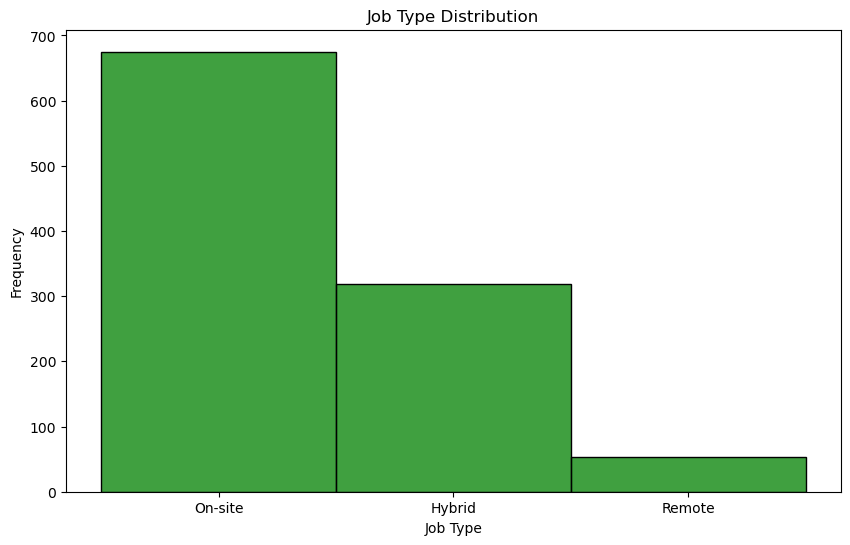

In [40]:
# Plot a histogram of job types
plt.figure(figsize=(10,6))
sns.histplot(df2['Job_type'], color='green', bins=20)
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.show()

#### Plotting Pie charts

In [41]:
j1 =df2['Job_Name'].value_counts().head(10)
j1

Job_Name
data analyst                                                                    62
senior data analyst                                                             12
senior analytics consultant                                                     11
senior software engineer                                                         7
lead data analyst                                                                7
lead ii - data analysis                                                          7
customer service new associate-query management                                  7
ea_p&u_data analyst (p&u ot)_staff                                               7
in-business credit risk quality assurance data analyst for wealth management     6
business development executive                                                   6
Name: count, dtype: int64

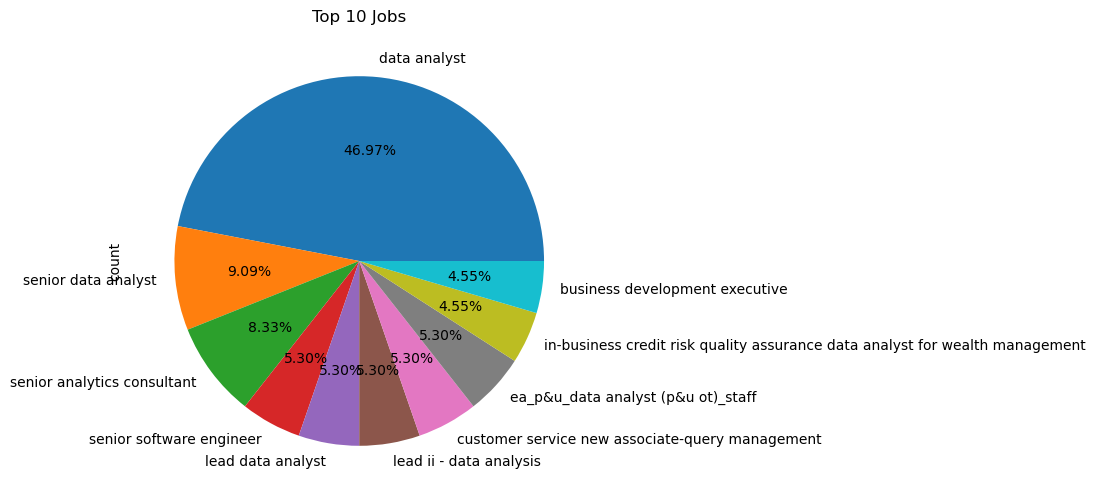

In [42]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Jobs')
d1=df2['Job_Name'].value_counts()
subset = d1[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

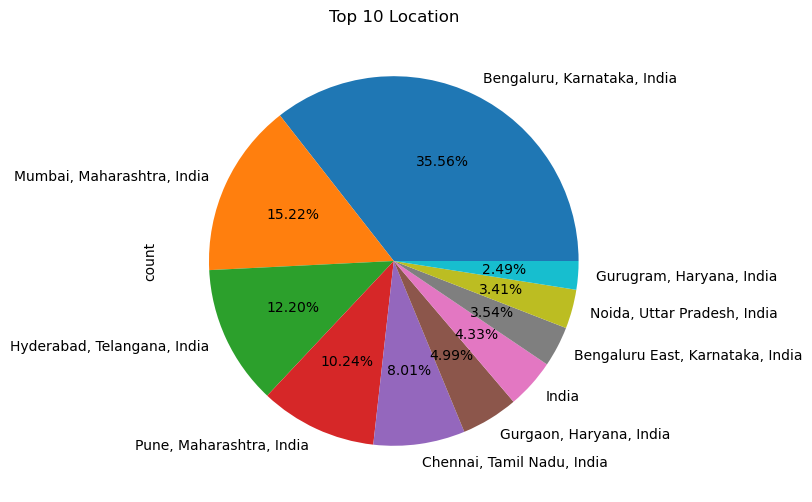

In [43]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Location')
d3=df2['Location'].value_counts()
subset = d3[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

In [44]:
c1 = df2.Company.value_counts().head(10)
c1

Company
accenture in india           50
wells fargo                  31
ey                           22
citi                         20
bny mellon                   20
infosys                      19
tata consultancy services    19
ust                          18
hcltech                      14
s&p global                   14
Name: count, dtype: int64

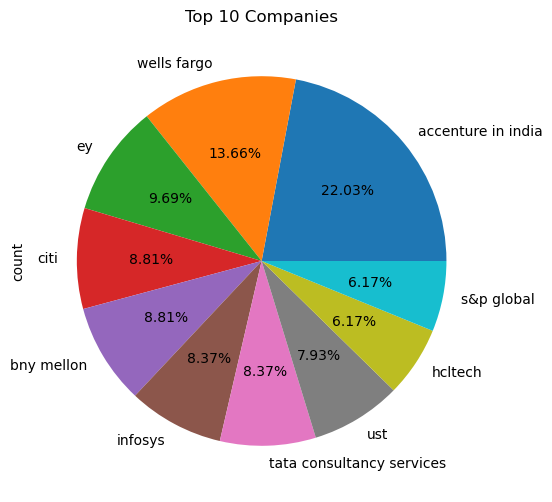

In [45]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Companies')
d2=df2['Company'].value_counts()
subset = d2[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

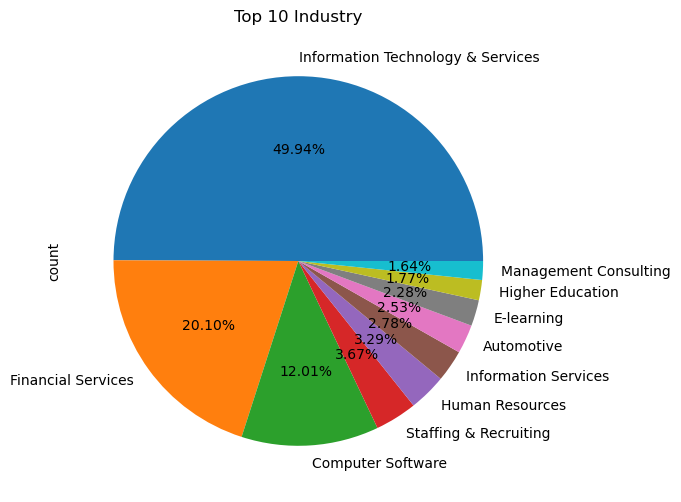

In [46]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Industry')
d7=df2['Industry'].value_counts()
subset = d7[:10]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

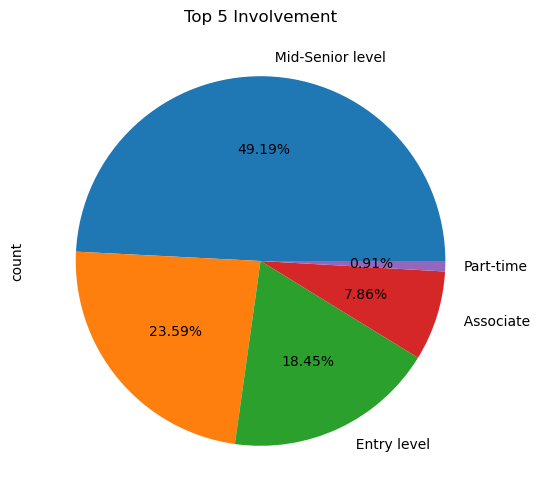

In [47]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Involvement')
d8=df2['Involvement'].value_counts()
subset = d8[:5]
subset.plot(kind="pie",autopct="%1.2f%%")
plt.show()

In [48]:
R1 =df2['Region'].value_counts().head(10)
R1

Region
Bengaluru                271
Mumbai                   116
Hyderabad                 93
Pune                      78
 Not Mention (remote)     62
Chennai                   61
Gurgaon                   38
Bengaluru East            27
Noida                     26
Gurugram                  19
Name: count, dtype: int64

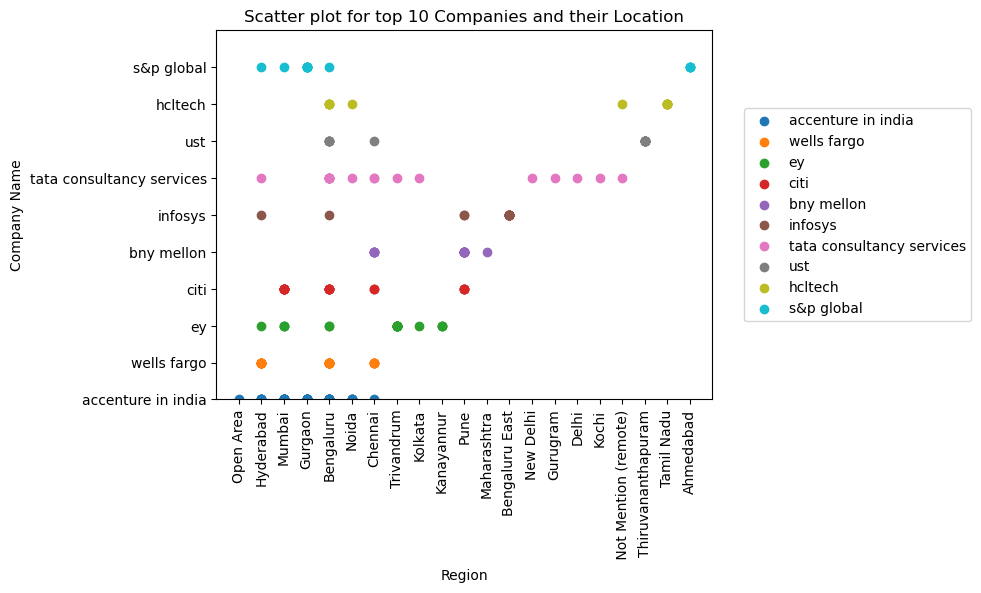

In [49]:
# Select Top 10 companies names
top_companies = c1.head(10).index.tolist()
for i, company in enumerate(top_companies):
    df_company = df2[df2['Company']==company]
    plt.scatter(df_company['Region'],df_company['Company'],label=company)
    
plt.title('Scatter plot for top 10 Companies and their Location')
plt.xlabel('Region')
plt.ylabel('Company Name')
plt.legend(loc='center left',bbox_to_anchor=(1.05,0.5))
plt.xticks(rotation='vertical')

plt.ylim(0,10)
plt.show()


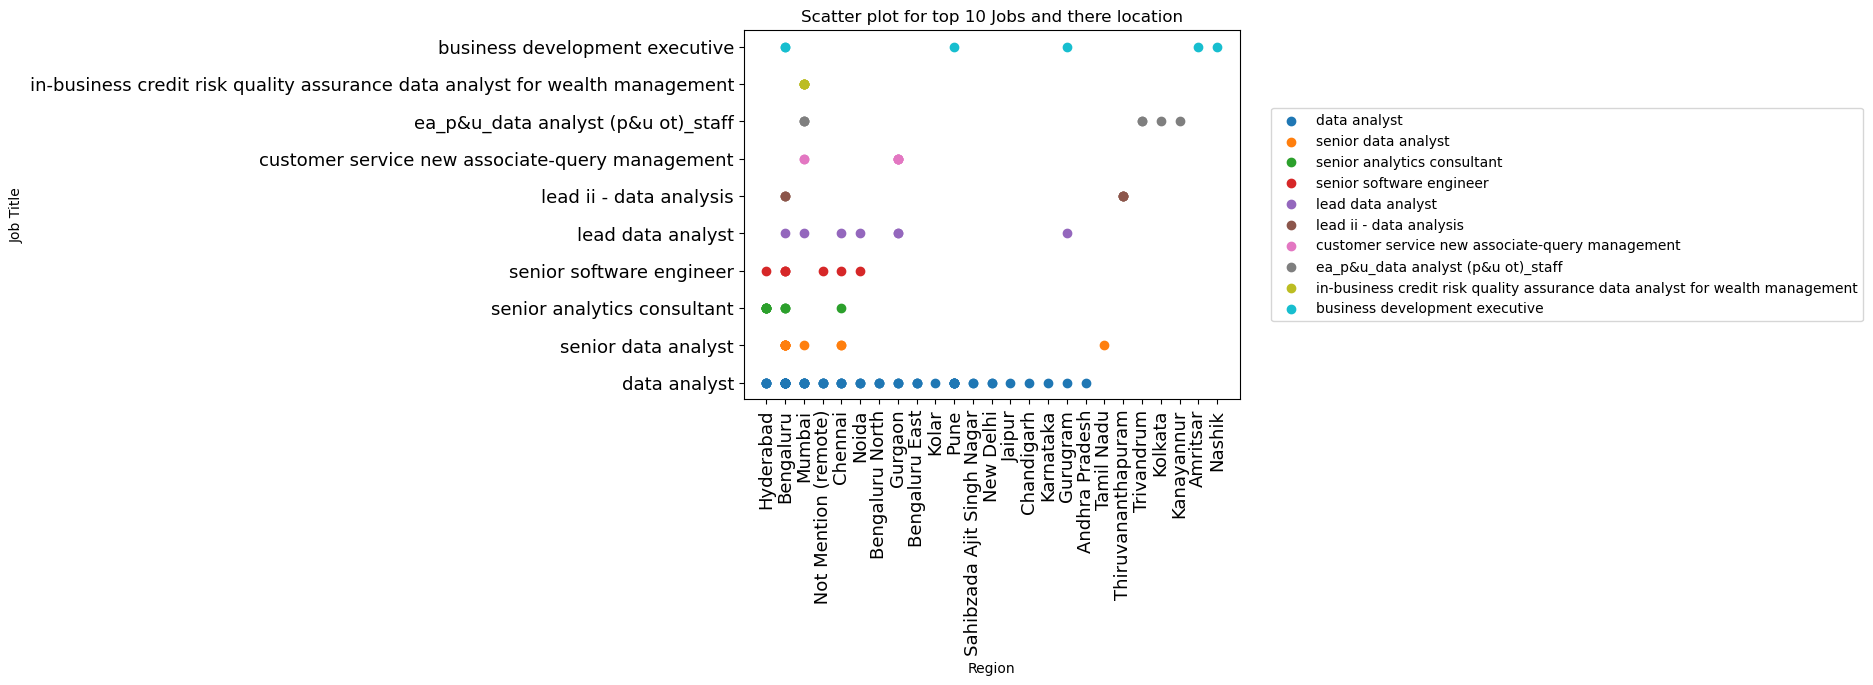

In [50]:
# Select top 10 job titles
top_jobs = j1.head(10).index.tolist()
for i, job in enumerate(top_jobs):
    df_job = df2[df2['Job_Name']==job]
    plt.scatter(df_job['Region'],df_job['Job_Name'],label=job)

# Draw scatter plot for top 10 jobs   
plt.title('Scatter plot for top 10 Jobs and there location')
plt.xlabel('Region')
plt.ylabel('Job Title')
plt.legend(loc='center left',bbox_to_anchor=(1.05,0.5))
plt.xticks(rotation='vertical',fontsize=13)
plt.yticks(fontsize= 13)
plt.show()


# Model Building

### Collaborative filtering

In [51]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

### Region Based Recommendation

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(encoded_data)
## Location based recommendation
def recommend_companies_regionwise(region_name, cosine_sim_matrix, df2):
    region_index = df2[df2['Region'] == region_name].index[0]
    cosine_scores = list(enumerate(cosine_sim_matrix[region_index]))
    cosine_scores = sorted(cosine_scores, key=lambda x: x[1], reverse=True)
    cosine_scores = cosine_scores[1:11] # top 10 similar companies
    region_indices = [i[0] for i in cosine_scores]
    return (df2.iloc[region_indices])
    #return list(df2['Job_Name'].iloc[region_indices],df2[]'Company'].iloc[region_indices],
    # df2['Job_type'].iloc[region_indices])
    #df_data=df2.loc[[region_indices], ['Job_Name', 'Company', 'Job_type']]
    #return df_data

similar_companies = recommend_companies_regionwise('Mumbai', cosine_sim_matrix, df2)
print(similar_companies)
#print(similar_companies.value_counts())


                                              Job_Name               Company  \
283  reference data management - index and benchmar...  jpmorgan chase & co.   
410  reference data management - index and benchmar...  jpmorgan chase & co.   
677  asset management - investment specialist suppo...  jpmorgan chase & co.   
131                            icg - analytics markets                  citi   
149  in-business credit risk quality assurance data...                  citi   
207  in-business credit risk quality assurance data...                  citi   
361                                d&m metrics analyst                  citi   
385  senior data research analyst - thematic & fact...            s&p global   
408  in-business credit risk quality assurance data...                  citi   
424  in-business credit risk quality assurance data...                  citi   

                       Location Job_type  Employees  Followers  Applicant  \
283  Mumbai, Maharashtra, India  On-site  

In [53]:
similar_companies = recommend_companies_regionwise('Bengaluru', cosine_sim_matrix, df2)
print(similar_companies)

                                               Job_Name  \
896                         mts silicon design engineer   
1120                dram controller verification leader   
16                                  engageone developer   
32                                   solution lead java   
35                                           oracle dba   
58                           stream lead/technical lead   
72    sr systems engineer 1/sr systems engineer 2 - ...   
80                   it unified communications engineer   
89                               sr engineer ai & mlops   
94                     technical lead - client services   

                        Company                     Location Job_type  \
896                         amd  Bengaluru, Karnataka, India  On-site   
1120                        amd  Bengaluru, Karnataka, India  On-site   
16                  ltimindtree  Bengaluru, Karnataka, India  On-site   
32        acara solutions india  Bengaluru, Karnataka, Ind

### State wise recommendation

In [54]:
def recommend_companies_statewise(state_name, cosine_sim_matrix, df2):
    state_index = df2[df2['State'] == state_name].index[0]
    cosine_scores_state = list(enumerate(cosine_sim_matrix[state_index]))
    cosine_scores_state = sorted(cosine_scores_state, key=lambda x: x[1], reverse=True)
    cosine_scores_state = cosine_scores_state[1:11] # top 10 similar companies
    state_indices = [j[0] for j in cosine_scores_state]
    return (df2.iloc[state_indices])
    #return list(df2['Job_Name'].iloc[region_indices],df2[]'Company'].iloc[region_indices], df2['Job_type'].iloc[region_indices])
    #df_data=df2.loc[[region_indices], ['Job_Name', 'Company', 'Job_type']]
    #return df_data

similar_companies_state = recommend_companies_statewise('Maharashtra', cosine_sim_matrix, df2)
print(similar_companies_state)

                                               Job_Name  \
1047                                  sfcc ui developer   
48                                application engineers   
92                                       pega cssa clsa   
434    analyst, data management & quantitative analysis   
572                         technology sales specialist   
724                                           associate   
853                               altiris administrator   
1075  opportunity with tietoevry for azure synapse f...   
7      tcs hiring for network data - r&s aruba wireless   
9      devsecops engineer/application security engineer   

                           Company                     Location Job_type  \
1047  swiftwin | a concord company           Maharashtra, India   Hybrid   
48           transreach talent llc  Bengaluru, Karnataka, India   Hybrid   
92                  process360 ltd  Hyderabad, Telangana, India   Hybrid   
434                     bny mellon           M

In [55]:
similar_companies_state = recommend_companies_statewise('Telangana', cosine_sim_matrix, df2)
print(similar_companies_state)

                                         Job_Name                    Company  \
573  assistant manager - saas - ito/otr-ana007498                    genpact   
579  assistant manager - saas - ito/otr-ana007498                    genpact   
999                      am - analytics-ana006097                    genpact   
589              assistant manager-sfdc developer                    genpact   
750                             manager-bfs026988                    genpact   
987                           tcs hiring for .net  tata consultancy services   
16                            engageone developer                ltimindtree   
35                                     oracle dba  tata consultancy services   
58                     stream lead/technical lead                     lentra   
132                                  data analyst                       twid   

                        Location Job_type  Employees  Followers  Applicant  \
573  Bengaluru, Karnataka, India  On-site

### Using TfidfVectorizer

(Text - vector) Term Frequency-Inverse Document Frequency Vectorizer" and it is a widely used technique to convert text into a numerical representation that can be used by machine learning algorithms.

Let's use TfidfVectorizer from scikit-learn to convert the job features into a matrix of TF-IDF features:


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [57]:
# Use the TfidfVectorizer to convert the job features into a matrix of TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
job_matrix = tfidf.fit_transform(df2['Region'])
job_similarity1= cosine_similarity(job_matrix)

In [58]:
# Compute the pairwise cosine similarity between all job pairs in the matrix
#job_similarity = cosine_similarity(job_matrix)
job_similarity=linear_kernel(job_matrix, job_matrix)

In [59]:
job_similarity[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [60]:
### Let's predict the locationwise jobs
# Choose a specific job location

def recommender_regionwise(Location,job_similarity1):
    # Get the row index of the chosen job in the job matrix
    job_location = df2[df2['Region'] == Location].index[0]

    # Get the cosine similarity scores between the chosen job and all other jobs
    similarity_scores = list(enumerate(job_similarity1[job_location]))

    # Sort the similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 most similar jobs
    top_jobs= [df2.iloc[i[0]]['Job_Name'] for i in sorted_scores[1:11]]
    return top_jobs
    #print(top_jobs_pune)

# Print the top 10 recommended jobs
#print('Top 10 Recommended Jobs for {}:'.format(df2.loc['Job_Name']))
#print('Top 10 Recommended Jobs for {}:') #.format(df2.loc['Job_Name', 'Job_Name']))

#for job in top_jobs:
    #print(top_jobs)


In [61]:
recommender_regionwise('Pune',job_similarity1)

['java lead/manager',
 'vc++ | pune | 4yrs - 6yrs',
 'sr. application engineer i',
 'gcp adminstrator',
 'data science',
 'data analyst_assistant manager_pune',
 'senior data analyst/data modellers',
 'lead analyst, data management & quantitative analysis',
 'servicenow performance analytics and reporting analyst',
 'marketing data analyst']

In [64]:
y_pred=recommender_regionwise('Pune',job_similarity1)

## Deployment

2024-02-17 18:14:08.675 
  command:

    streamlit run C:\Users\Sayali Hatwar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


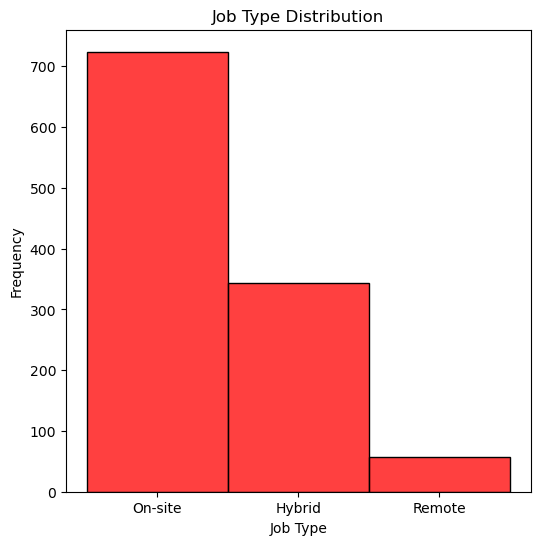

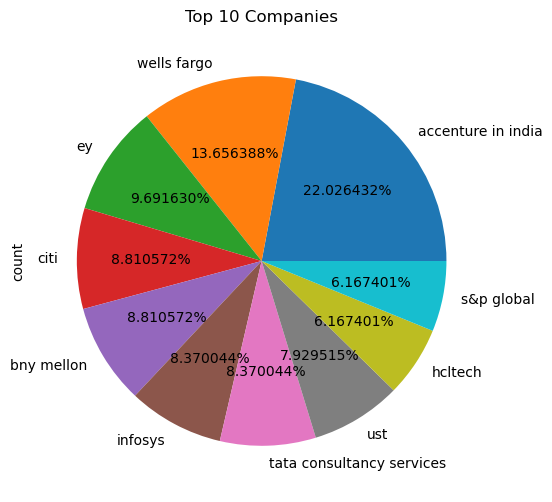

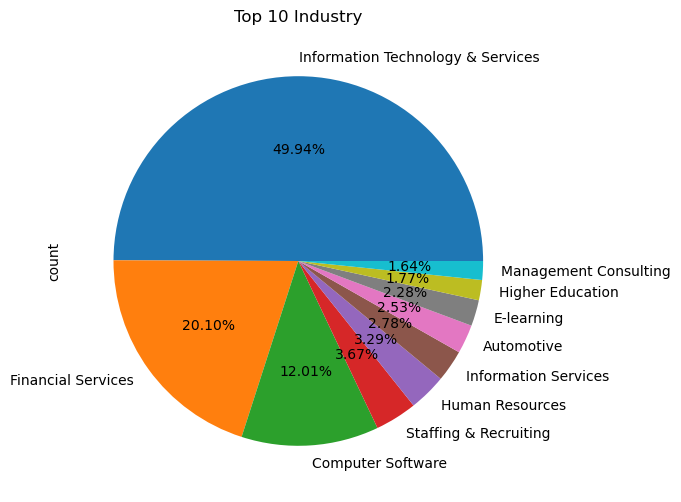

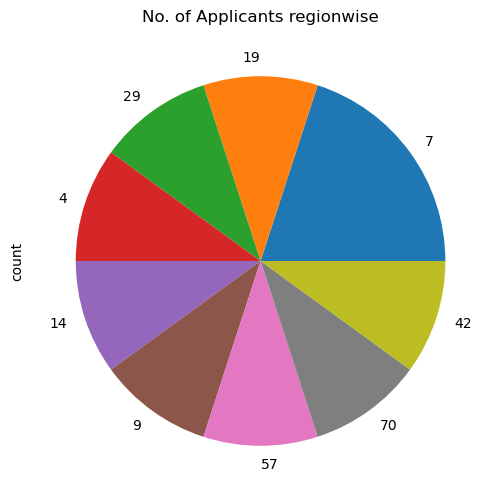

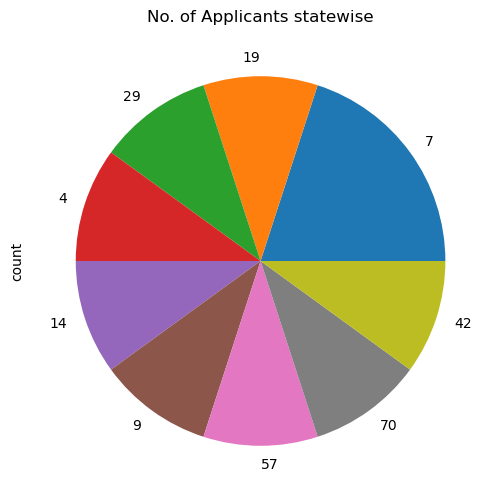

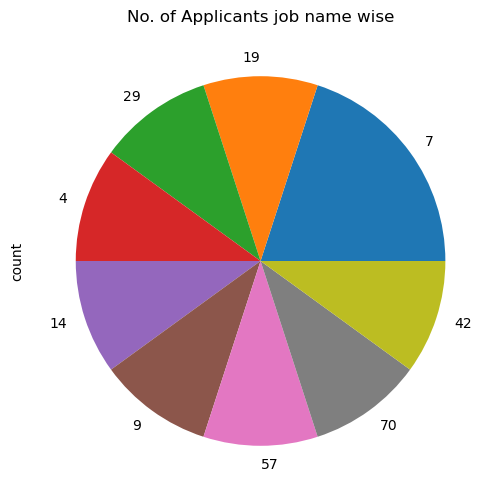

In [65]:
import pickle
import streamlit as st
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import seaborn as sns
st.title('Recommendation System ')
col1, col2, col3 = st.columns(3)
# Show plots
with col1:
    fig1, ax1 = plt.subplots(figsize=(6, 6))
    sns.histplot(df['Job_type'], color='red', bins=10, ax=ax1)
    ax1.set_title('Job Type Distribution')
    ax1.set_xlabel('Job Type')
    ax1.set_ylabel('Frequency')
    st.pyplot(fig1)

with col2:
    plt.figure(figsize=(6,6))
    plt.title('Top 10 Companies')
    d3=df2['Company'].value_counts()
    subset = d2[:10]
    subset.plot(kind="pie",autopct="%1f%%")
    st.pyplot(plt)

with col3:
    plt.figure(figsize=(6,6))
    plt.title('Top 10 Industry')
    d7=df2['Industry'].value_counts()
    subset = d7[:10]
    subset.plot(kind="pie",autopct="%1.2f%%")
    st.pyplot(plt)
    
    def recommend_companies_jobname(jobname1, cosine_sim_matrix, df2):
        job_index = df2[df2['Job_Name'] == jobname1].index[0]
        cosine_scores_job = list(enumerate(cosine_sim_matrix[job_index]))
        cosine_scores_job = sorted(cosine_scores_job, key=lambda x:x[1], reverse=True)
        cosine_scores_job = cosine_scores_job[1:11] 
        job_indices = [j[0] for j in cosine_scores_job]
        return (df2.iloc[job_indices])

def app():
    #st.set_page_config(fullscreen=True)



    # Show recommendations
#st.header('Recommendations')
    region_name = st.selectbox('Select a region', df2['Region'].unique(),index=0)
    similar_companies = recommend_companies_regionwise(region_name, cosine_sim_matrix, df2)
    st.subheader(f'Top 10 similar companies to {region_name}:')
    st.write(similar_companies)

    state_name = st.selectbox('Select a state', df2['State'].unique())
    similar_companies_state = recommend_companies_statewise(state_name, cosine_sim_matrix, df2)
    st.subheader(f'Top 10 similar companies to {state_name}:')
    st.write(similar_companies_state)
    
    jobname1 = st.selectbox('Select a Job Name', df2['Job_Name'].unique())
    similar_companies_jobname=recommend_companies_jobname(jobname1, cosine_sim_matrix, df2)
    st.subheader(f'Top 10 similar to {jobname1}:')
    st.write(similar_companies_jobname)
    col4, col5, col6 = st.columns(3)

    with col4:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants regionwise')

        dd4=similar_companies['Applicant'].value_counts()
        dd4.plot(kind="pie")
        st.pyplot(plt)

    with col5:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants statewise')
        dd5=similar_companies_state['Applicant'].value_counts()
        dd5.plot(kind="pie")
        st.pyplot(plt)


    with col6:
        plt.figure(figsize=(12,6))
        plt.title('No. of Applicants job name wise')
        dd6=similar_companies_jobname['Applicant'].value_counts()
        dd6.plot(kind="pie")
        st.pyplot(plt)





# Run app
if __name__ == '__main__':
    app()